### Data Dictionary

In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *
from pycaret.clustering import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("drug200.csv")

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df.shape

(200, 6)

In [7]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Data Visualization

### Univariate Data Exploration

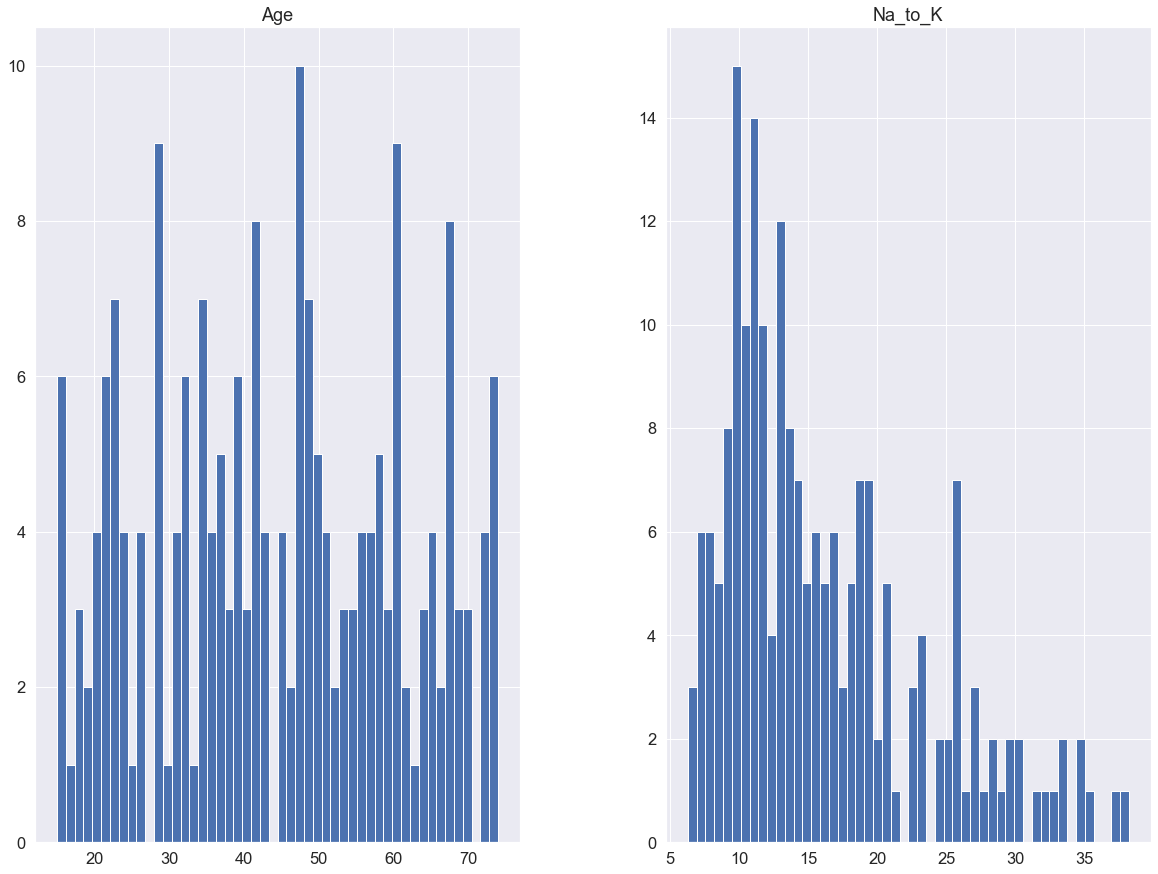

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Using Pycaret

In [9]:
exp_cat = setup(data = df, target = 'Drug', session_id=123, normalize=True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(200, 6)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,0.023900,0.009000,0.059800,0.995200,0.030000,0.013200
1,Decision Tree,0.014300,0.014300,0.037800,0.992400,0.009700,0.006900
2,Extreme Gradient Boosting,0.080900,0.019200,0.116100,0.987800,0.045300,0.030800
3,Gradient Boosting Regressor,0.080500,0.022700,0.121500,0.986200,0.043800,0.032100
4,AdaBoost Regressor,0.042500,0.019700,0.116400,0.981900,0.033300,0.020700
5,CatBoost Regressor,0.093900,0.027700,0.148800,0.980000,0.066300,0.035600
6,Extra Trees Regressor,0.094300,0.040200,0.177900,0.974400,0.083400,0.038600
7,Light Gradient Boosting Machine,0.178000,0.062600,0.240200,0.955800,0.105700,0.072700
8,Support Vector Machine,0.455200,0.423300,0.627800,0.718200,0.240700,0.153100
9,K Neighbors Regressor,0.464300,0.565300,0.730600,0.609700,0.264300,0.167600


In [11]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.1429,0.1429,0.3780,0.9241,0.0973,0.0694
9,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [12]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [13]:
tuned_dt = tune_model('dt', optimize='mse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1224,0.0700,0.2645,0.9683,0.0714,0.0476
1,0.0714,0.0357,0.1890,0.9091,0.0545,0.0298
2,0.0714,0.0358,0.1892,0.9882,0.0547,0.0467
3,0.0373,0.0194,0.1394,0.9810,0.0374,0.0124
4,0.0373,0.0194,0.1394,0.9749,0.0429,0.0186
5,0.2109,0.1040,0.3225,0.9428,0.0910,0.0966
6,0.1088,0.0554,0.2354,0.9692,0.0661,0.0452
7,0.1429,0.0714,0.2673,0.9633,0.0771,0.0694
8,0.2536,0.2005,0.4478,0.8935,0.1206,0.1278
9,0.0769,0.0385,0.1961,0.9847,0.0566,0.0417


In [14]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


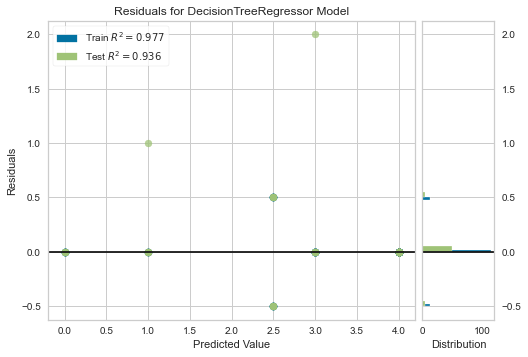

In [15]:
plot_model(tuned_dt)

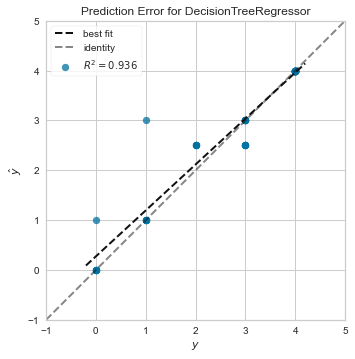

In [16]:
plot_model(tuned_dt, plot='error')

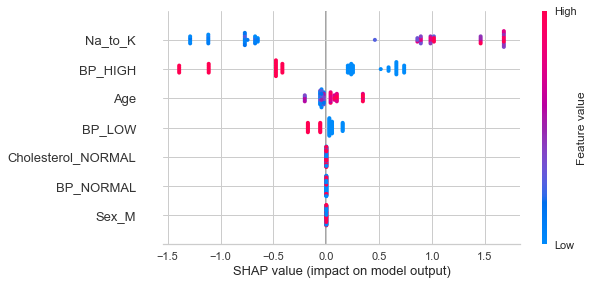

In [17]:
interpret_model(tuned_dt)

In [18]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
predict_model(tuned_dt)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.123,0.1189,0.3447,0.9364,0.137,0.0697


,Age,Na_to_K,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug,Label
0,0.829248,0.462333,0.0,1.0,0.0,0.0,0.0,4,4.0
1,-0.564446,-1.143440,1.0,0.0,0.0,1.0,1.0,3,3.0
2,-0.322065,-0.297880,1.0,0.0,1.0,0.0,1.0,3,2.5
3,-1.352186,-1.100975,1.0,0.0,1.0,0.0,0.0,2,2.5
4,-0.746232,1.372424,0.0,1.0,0.0,0.0,1.0,4,4.0
...,...,...,...,...,...,...,...,...,...
56,0.162699,-0.599162,0.0,0.0,1.0,0.0,0.0,2,2.5
57,1.738179,0.314121,0.0,1.0,0.0,0.0,0.0,4,4.0
58,-1.109805,0.426945,0.0,1.0,0.0,0.0,1.0,4,4.0
59,1.374607,0.639550,1.0,0.0,1.0,0.0,1.0,4,4.0
